In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#to display entire rows and columns
pd.options.display.max_columns=None
pd.options.display.max_rows=None
# supress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
#set the plot size
plt.rcParams['figure.figsize'] = (10, 6)

In [4]:
data = pd.read_csv("C:/Users/ashish/Desktop/all dtaset/SeoulBikeData.csv",engine='python')
data.head(2)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday,Functioning Day
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday,Yes


In [5]:
#print shape
print('Dimesnions of dataset :',data.shape)

Dimesnions of dataset : (8760, 14)


In [6]:
#check the datatypes and null vallue presence
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8760 entries, 0 to 8759
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Date                       8760 non-null   object 
 1   Rented Bike Count          8760 non-null   int64  
 2   Hour                       8760 non-null   int64  
 3   Temperature(°C)            8760 non-null   float64
 4   Humidity(%)                8760 non-null   int64  
 5   Wind speed (m/s)           8760 non-null   float64
 6   Visibility (10m)           8760 non-null   int64  
 7   Dew point temperature(°C)  8760 non-null   float64
 8   Solar Radiation (MJ/m2)    8760 non-null   float64
 9   Rainfall(mm)               8760 non-null   float64
 10  Snowfall (cm)              8760 non-null   float64
 11  Seasons                    8760 non-null   object 
 12  Holiday                    8760 non-null   object 
 13  Functioning Day            8760 non-null   objec

In [7]:
#Check Rented Bike Count range
print('Rented Bike Count range is lies between :',data['Rented Bike Count'].min(), 'to',data['Rented Bike Count'].max())

Rented Bike Count range is lies between : 0 to 3556


In [8]:
#check the mean of Rented Bike Count
print('mean of Rented Bike Count :',data['Rented Bike Count'].mean())

mean of Rented Bike Count : 704.6020547945205


In [9]:
#check the median of Rented Bike Count
print('median of Rented Bike Count :',data['Rented Bike Count'].median())

median of Rented Bike Count : 504.5


In [10]:
#check the mode of Rented Bike Count
print('mode of Rented Bike Count :',data['Rented Bike Count'].mode()[0])

mode of Rented Bike Count : 0


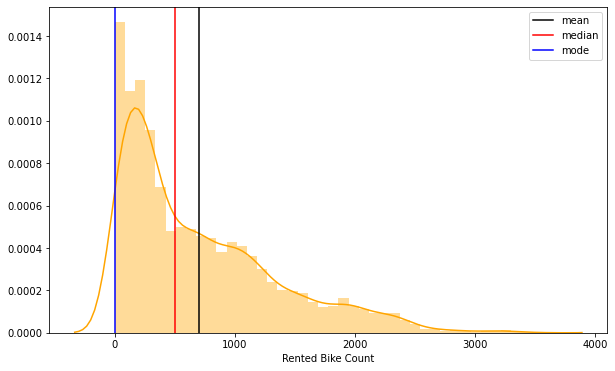

skewness of price : 1.1534281773679014


In [11]:
#check distribution of price 
sns.distplot(data['Rented Bike Count'],color='orange')
plt.axvline(x=data['Rented Bike Count'].mean(), color='black',label='mean')
plt.axvline(x=data['Rented Bike Count'].median(), color='red',label='median')
plt.axvline(x=data['Rented Bike Count'].mode()[0], color='blue',label='mode')
plt.legend()
plt.show()

print('skewness of price :',data['Rented Bike Count'].skew())

In [12]:
print('three sigma value is :',data['Rented Bike Count'].mean()+3*data['Rented Bike Count'].std())  
# Rented Bike Count is not folowing Gaussian distribution

three sigma value is : 2639.5944580121723


In [13]:
index=data.index[data['Functioning Day']=='No']  # fiding the poisition if non-functioning days
data=data.drop(index)
data['Functioning Day'].value_counts()                # checking the count of functioning day

Yes    8465
Name: Functioning Day, dtype: int64

In [14]:
data1=data.drop('Functioning Day',1)

In [15]:
data1.head(2)

,Date,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm),Seasons,Holiday
0,01/12/2017,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday
1,01/12/2017,204,1,-5.5,38,0.8,2000,-17.6,0.0,0.0,0.0,Winter,No Holiday


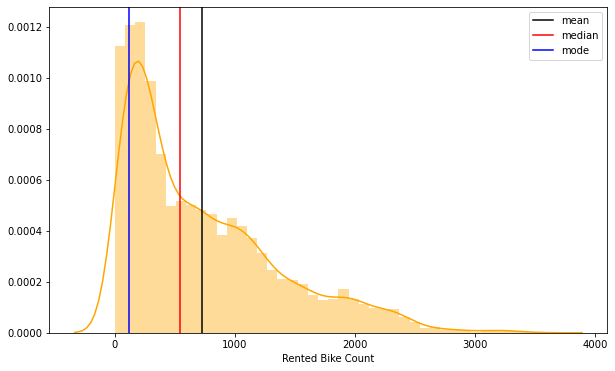

skewness of price : 1.1397000550865888


In [16]:
#check distribution of price 
sns.distplot(data1['Rented Bike Count'],color='orange')
plt.axvline(x=data1['Rented Bike Count'].mean(), color='black',label='mean')
plt.axvline(x=data1['Rented Bike Count'].median(), color='red',label='median')
plt.axvline(x=data1['Rented Bike Count'].mode()[0], color='blue',label='mode')
plt.legend()
plt.show()

print('skewness of price :',data1['Rented Bike Count'].skew())

In [17]:
num_data=data.select_dtypes(include=np.number)
cat_data=data.select_dtypes(exclude=np.number)

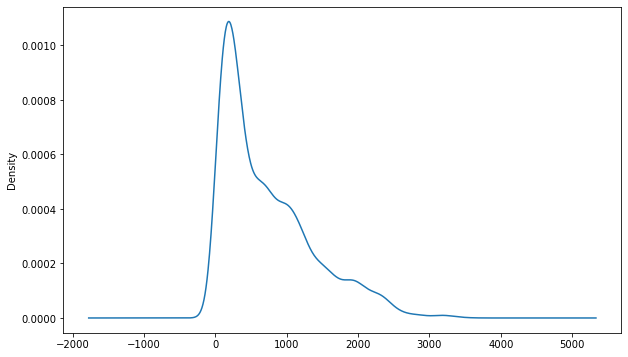

In [18]:
data['Rented Bike Count'].plot(kind='kde')

based on the above plot we can say that the data is right skewed also maximum values lie between 0 and 1000.

In [19]:
num_data.head(1)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),Rainfall(mm),Snowfall (cm)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,0.0,0.0


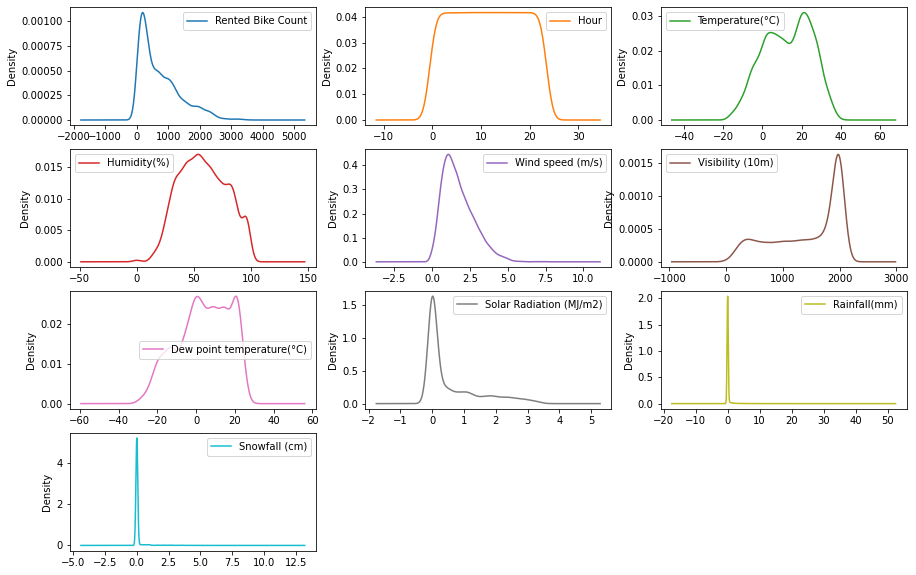

In [20]:
num_data.plot(kind='kde',subplots=True,layout=(4,3),sharex=False,figsize=(15,10))
plt.show()

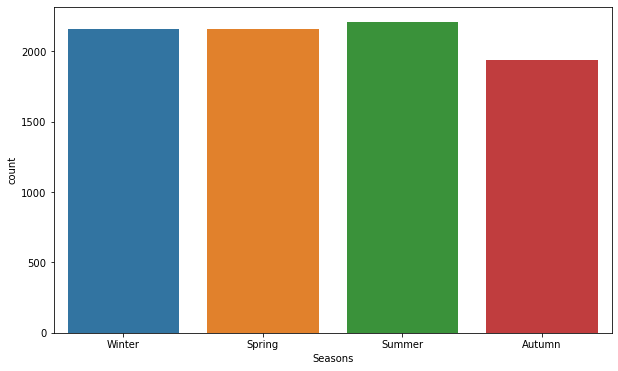

In [21]:
sns.countplot(cat_data['Seasons'])

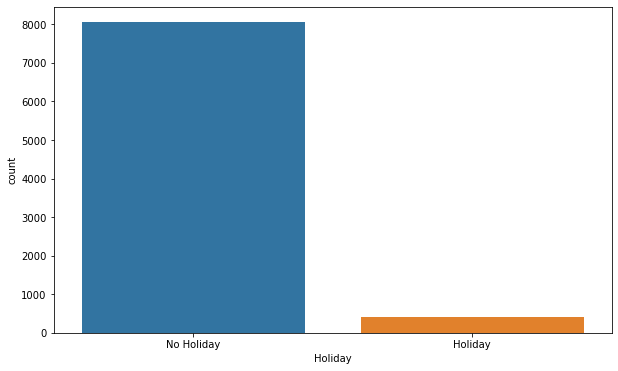

In [22]:
sns.countplot(cat_data['Holiday'])

the bike count is comparitively lot more on 'No Holiday' than during a holiday

(array([3366., 1610., 1310.,  908.,  512.,  408.,  248.,   61.,   26.,
          16.]),
 array([2.0000e+00, 3.5740e+02, 7.1280e+02, 1.0682e+03, 1.4236e+03,
        1.7790e+03, 2.1344e+03, 2.4898e+03, 2.8452e+03, 3.2006e+03,
        3.5560e+03]),
 <a list of 10 Patch objects>)

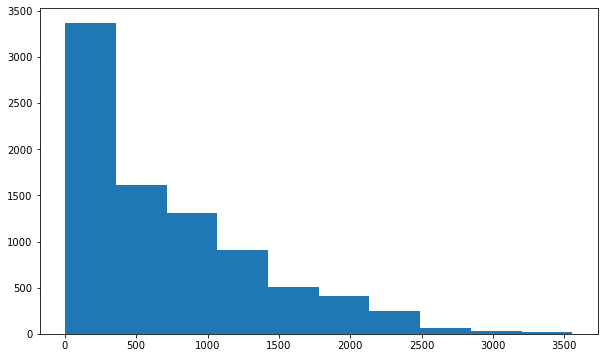

In [23]:
plt.hist(data['Rented Bike Count'],bins=10)

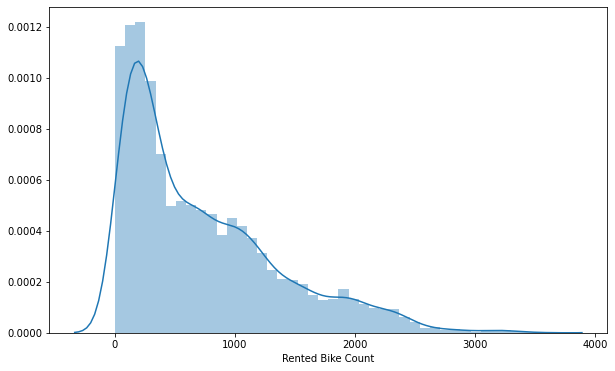

In [24]:
sns.distplot(data['Rented Bike Count'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1b85bf0f160>,
 'caps': [<matplotlib.lines.Line2D at 0x1b85bf0f820>,
 'boxes': [<matplotlib.lines.Line2D at 0x1b85bd1bdc0>],
 'medians': [<matplotlib.lines.Line2D at 0x1b85bf0fee0>],
 'fliers': [<matplotlib.lines.Line2D at 0x1b85bf02220>],
 'means': []}

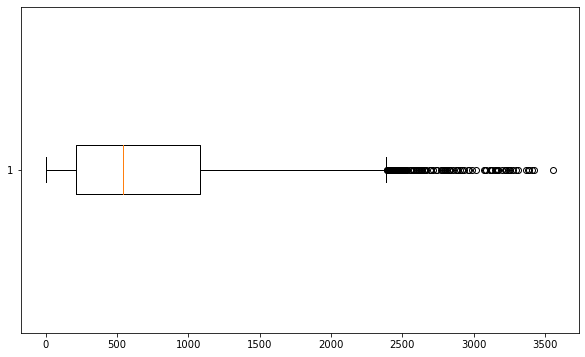

In [25]:
plt.boxplot(data['Rented Bike Count'],vert=False)

there are a lot of outliers in the data

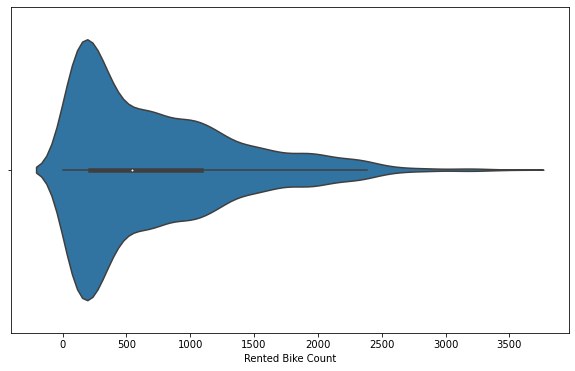

In [26]:
sns.violinplot(data['Rented Bike Count'])

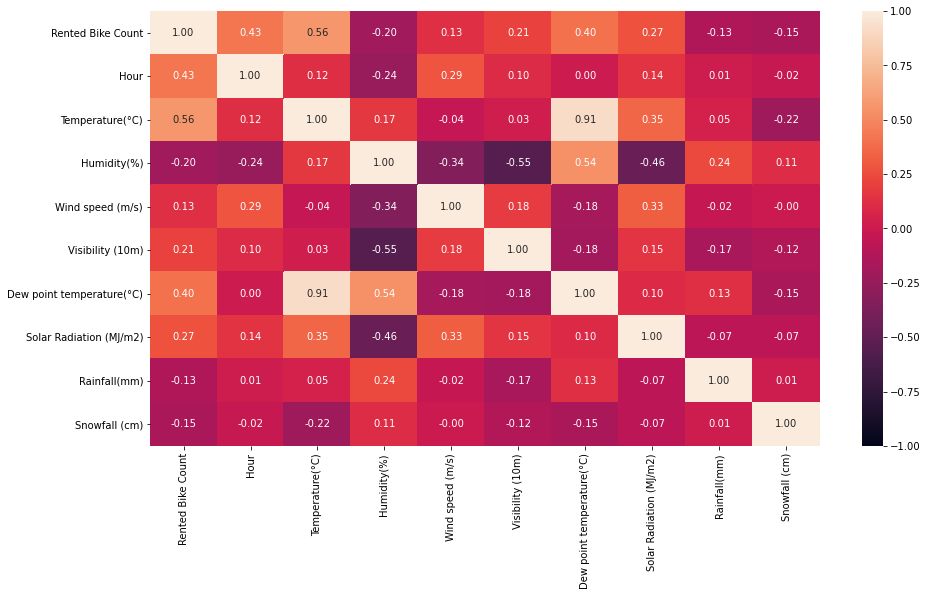

In [27]:
plt.figure(figsize=(15, 8))           # plotting a heatmap to see correlation
corr=num_data.corr()
sns.heatmap(corr,annot=True,fmt='0.2f',vmax=1,vmin=-1)

so here we can see that the dew point temperature and the Tempereature have a very high positive correlation.

Text(0.5, 1.0, 'Rented Bike Count distribution across hour')

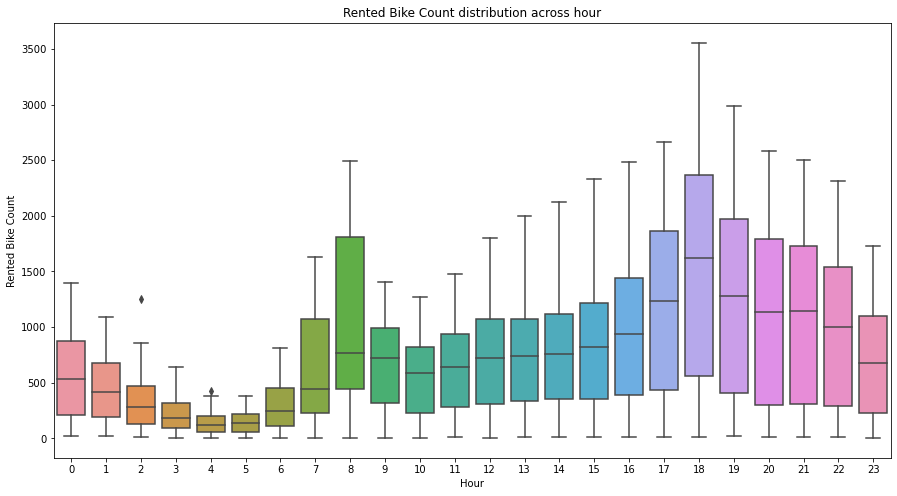

In [28]:
plt.figure(figsize=(15, 8))        # checking the number of bikes plotted every hou
sns.boxplot(data['Hour'],data['Rented Bike Count']).set_title('Rented Bike Count distribution across hour')

As per the above plot, we can there are 2 peaks one is during the 8 am and the second and the maximum one is during 5pm to 7pm.

Text(0.5, 1.0, 'Rented Bike Count distribution across Seasons')

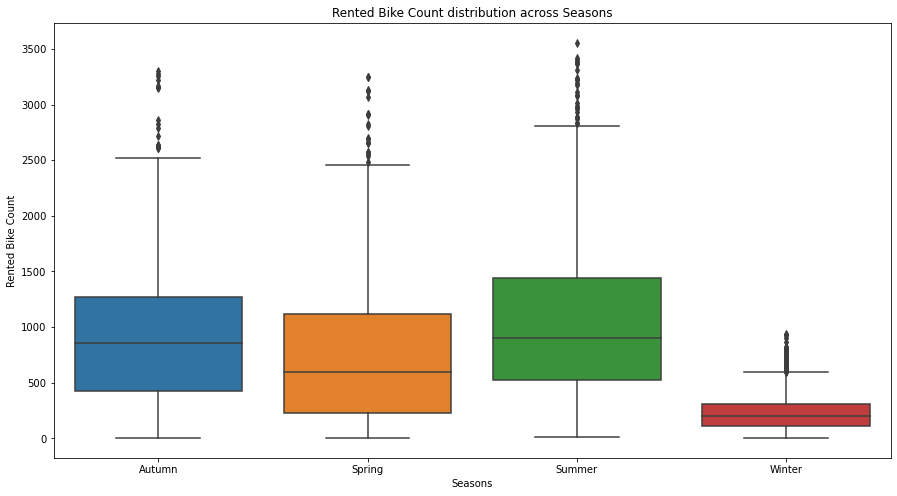

In [29]:
plt.figure(figsize=(15, 8))         #Represntation of the rented bike count based on seasons
sns.boxplot(data['Seasons'],data['Rented Bike Count'],order=['Autumn','Spring','Summer','Winter']).set_title('Rented Bike Count distribution across Seasons')

Text(0.5, 1.0, 'Rented Bike Count distribution across Holidays')

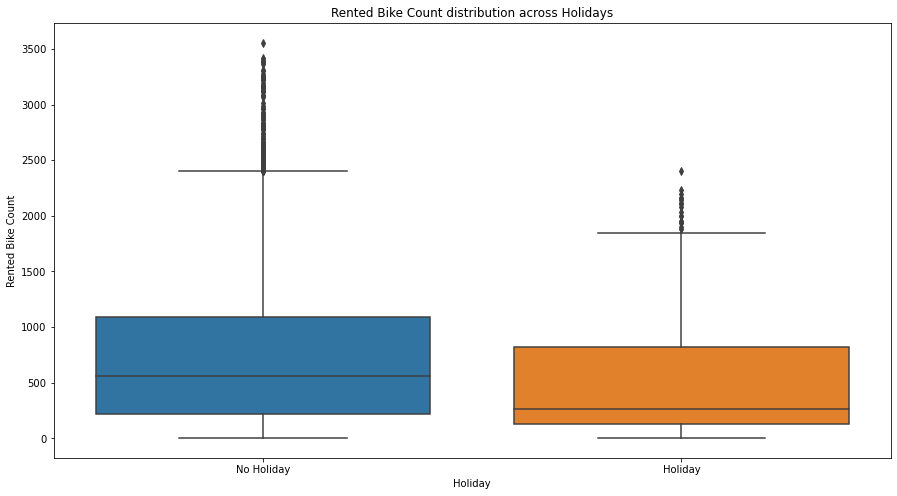

In [30]:
plt.figure(figsize=(15, 8))
sns.boxplot(data['Holiday'],data['Rented Bike Count']).set_title('Rented Bike Count distribution across Holidays')

As per the above boxplot , we can see that more number of bikes have been hired on a working day instead of a holiday.

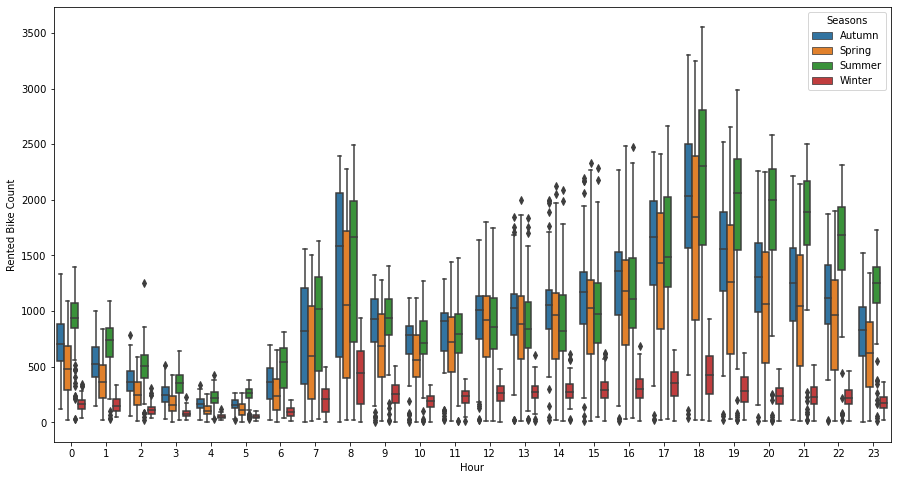

In [31]:
plt.figure(figsize=(15, 8))
sns.boxplot(x=data['Hour'],y=data['Rented Bike Count'],hue=data['Seasons'],hue_order=['Autumn','Spring','Summer','Winter'])

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
        51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64]),
 <a list of 65 Text major ticklabel objects>)

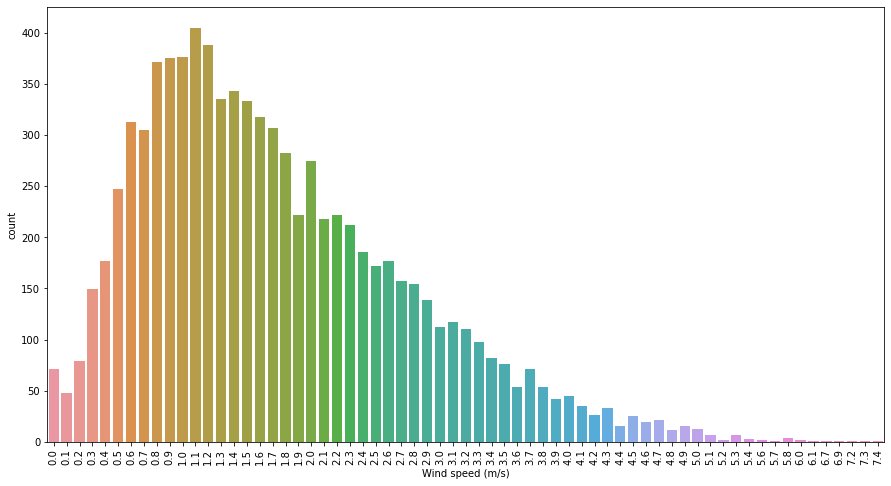

In [32]:
plt.figure(figsize=(15, 8))
sns.countplot(data['Wind speed (m/s)']) 
plt.xticks(rotation=90)

# One Way Annova

In [33]:
from scipy.stats import f_oneway
f_oneway(data['Rented Bike Count'][data['Holiday'] == 'Holiday'], 
             data['Rented Bike Count'][data['Holiday'] == 'No Holiday'])

F_onewayResult(statistic=41.756702644597624, pvalue=1.0907798935730756e-10)

In [34]:
tab=pd.crosstab(data['Holiday'],data['Seasons'])/data['Seasons'].value_counts()*100

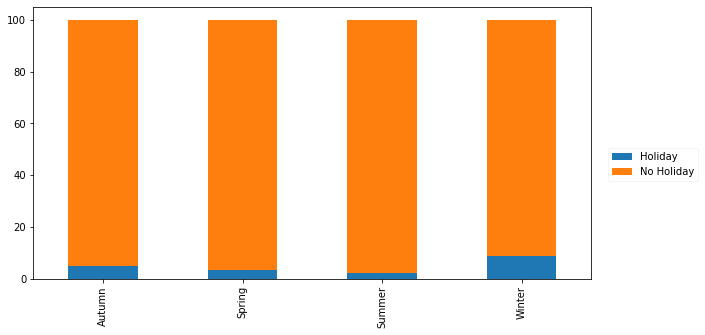

In [35]:
(tab.T).plot(kind='bar',stacked=True,figsize=(10,5))
plt.legend(framealpha=0.2,bbox_to_anchor=(1,0,0.2,0.5))

As per the above plot we can say that winter has maximum holidays(for christmas) and we can see that maximum days are working days.

In [36]:
#Capping to remove outliers
Q1 = data1.quantile(0.25)
Q3 = data1.quantile(0.75)
# calculate of interquartile range 
IQR = Q3 - Q1
data1=data1[~((data1<(Q1-1.5*IQR))|(data1>(Q3+1.5*IQR))).any(axis=1)]

In [37]:
num_data1=data1.select_dtypes(include=np.number)
cat_data1=data1.select_dtypes(exclude=np.number)

In [38]:
cat_data1['Date'] = pd.to_datetime(cat_data1['Date'])

In [39]:
cat_data1['day'] = cat_data1['Date'].dt.day
cat_data1['month'] = cat_data1['Date'].dt.month
cat_data1['year'] = cat_data1['Date'].dt.year

In [40]:
cat_data1.head(2)

,Date,Seasons,Holiday,day,month,year
0,2017-01-12,Winter,No Holiday,12,1,2017
1,2017-01-12,Winter,No Holiday,12,1,2017


In [41]:
cat_data1=cat_data1.drop('Date',1)

In [42]:
cat_data1=pd.get_dummies(cat_data1,columns=['Holiday','Seasons','year'])

In [43]:
cat_data1.head(2)

,day,month,Holiday_Holiday,Holiday_No Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,year_2017,year_2018
0,12,1,0,1,0,0,0,1,1,0
1,12,1,0,1,0,0,0,1,1,0


In [44]:
data3=pd.concat([num_data1,cat_data1],1)
data3=data3.drop(['Rainfall(mm)','Snowfall (cm)'],1)
data3.head(2)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),day,month,Holiday_Holiday,Holiday_No Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,year_2017,year_2018
0,254,0,-5.2,37,2.2,2000,-17.6,0.0,12,1,0,1,0,0,0,1,1,0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0,12,1,0,1,0,0,0,1,1,0


In [45]:
data3['day']=data3.groupby(['day'])['Rented Bike Count'].transform('mean')

In [46]:
data3['month']=data3.groupby(['month'])['Rented Bike Count'].transform('mean')

In [47]:
num_data3=data1.select_dtypes(include=np.number)
num_data3=num_data3.drop(['Rainfall(mm)','Snowfall (cm)'],1)
num_data3.head(2)

,Rented Bike Count,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2)
0,254,0,-5.2,37,2.2,2000,-17.6,0.0
1,204,1,-5.5,38,0.8,2000,-17.6,0.0


In [48]:
num_data3=num_data3.reset_index(drop=True)

In [49]:
from sklearn.preprocessing import StandardScaler       
sc=StandardScaler()
num_two_col_sc=sc.fit_transform(num_data3.drop('Rented Bike Count',1))
num_two_col_sc=pd.DataFrame(num_two_col_sc,columns=num_data3.iloc[:,1:].columns)
num_two_col_sc.head(2)

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2)
0,-1.558756,-1.511294,-1.099498,0.633376,0.90865,-1.626189,-0.634522
1,-1.420507,-1.537141,-1.046409,-0.868257,0.90865,-1.626189,-0.634522


In [50]:
num_sc=num_two_col_sc.reset_index(drop=True)

In [51]:
cat_data1=cat_data1.reset_index(drop=True)

In [52]:
final_data=pd.concat([num_two_col_sc,cat_data1],axis=1)
final_data.head(2)

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),day,month,Holiday_Holiday,Holiday_No Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,year_2017,year_2018
0,-1.558756,-1.511294,-1.099498,0.633376,0.90865,-1.626189,-0.634522,12,1,0,1,0,0,0,1,1,0
1,-1.420507,-1.537141,-1.046409,-0.868257,0.90865,-1.626189,-0.634522,12,1,0,1,0,0,0,1,1,0


In [53]:
final_data.shape

(6669, 17)

In [54]:
##Base model-1 using ols packag

In [55]:
#Load the independent and dependent features
inp=final_data
out=num_data3['Rented Bike Count']

In [56]:
#Load required libraries
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score,mean_squared_error

In [57]:
#Split the dataset into train and test 
xtrain,xtest,ytrain,ytest= train_test_split(inp,out,test_size=.3,random_state=48)

In [58]:
#check the dimensions
print('Dimensions of x_train:',xtrain.shape)
print('Dimensions of y_train:',ytrain.shape)
print('Dimensions of x_test:',xtest.shape)
print('Dimensions of y_test:',ytest.shape)

Dimensions of x_train: (4668, 17)
Dimensions of y_train: (4668,)
Dimensions of x_test: (2001, 17)
Dimensions of y_test: (2001,)


In [59]:
#build a model using OLS method

import statsmodels.api as sm

inpc1=sm.add_constant(xtrain)
ols=sm.OLS(ytrain,inpc1)
linear_model_using_ols=ols.fit() 
print(linear_model_using_ols.summary())

                            OLS Regression Results                            
Dep. Variable:      Rented Bike Count   R-squared:                       0.567
Model:                            OLS   Adj. R-squared:                  0.566
Method:                 Least Squares   F-statistic:                     435.0
Date:                Fri, 05 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:08:21   Log-Likelihood:                -34532.
No. Observations:                4668   AIC:                         6.909e+04
Df Residuals:                    4653   BIC:                         6.919e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
const                 

In [60]:
#predict price for test data
from statsmodels.api import add_constant
xtest_with_constant=add_constant(xtest,has_constant='add')
ypred_ols=linear_model_using_ols.predict(xtest_with_constant)
ypred_ols.shape

(2001,)

In [61]:
#find Performance
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tools.eval_measures import rmse

#rmse
ols_rmse=rmse(ytest,ypred_ols)
#r2_score
ols_r2=r2_score(ytest,ypred_ols)
#adj_r2_score
ols_adj_r2=1-(((1-ols_r2)*(len(xtest)-1))/(len(xtest)-len(xtest.columns)-1))

print('rmse:',ols_rmse,'\n','r2_score:',ols_r2,'\n','adj_r2:',ols_adj_r2)

rmse: 404.8206754853496 
 r2_score: 0.5400433440763313 
 adj_r2: 0.5361001957401224


In [62]:
score_card = pd.DataFrame(columns=['Model_Name', 'R-Squared', 'Adj. R-Squared', 'RMSE'])

linreg_full_base_model_using_ols = pd.Series({
                     'Model_Name': "LRM_using _OLS",
                     'RMSE':ols_rmse,
                     'R-Squared':ols_r2 ,
                     'Adj. R-Squared': ols_adj_r2    
                   })

score_card = score_card.append(linreg_full_base_model_using_ols , ignore_index=True)

#call scorecard
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,LRM_using _OLS,0.540043,0.5361,404.820675


In [63]:
##Base model-2 using sklearn package

In [64]:
Lr=LinearRegression()
Lr.fit(xtrain,ytrain) 
ypred=Lr.predict(xtest)
print('predicted values:',ypred,'\n')
intercept=Lr.intercept_
print('Intercept:',intercept,'\n')
Coeff=Lr.coef_
print('Coefficents :',Coeff)

predicted values: [1209.37179603  490.1730269  1222.12939917 ...  811.40393763 1599.86404682
 1317.59861207] 

Intercept: 728.5819427271125 

Coefficents : [ 217.80303248  254.86368892 -121.49003029   15.66930019    8.7970293
   58.69067194  -22.38686577   -0.64414502   -0.55733216  -68.23615849
   68.23615849  175.59760815   21.87302148   12.03310311 -209.50373274
   42.78821519  -42.78821519]


In [65]:
#find Performance
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tools.eval_measures import rmse

#rmse
lr_rmse=rmse(ytest,ypred)
#r2_score
lr_r2=r2_score(ytest,ypred)
#adj_r2_score
lr_adj_r2=1-(((1-lr_r2)*(len(xtest)-1))/(len(xtest)-len(xtest.columns)-1))

print('rmse:',lr_rmse,'\n','r2_score:',lr_r2,'\n','adj_r2:',lr_adj_r2)

rmse: 404.8206754853498 
 r2_score: 0.5400433440763308 
 adj_r2: 0.5361001957401219


In [66]:
linreg_full_base_model_using_sklearn = pd.Series({
                     'Model_Name': "LRM_using_sklearn ",
                     'RMSE':lr_rmse,
                     'R-Squared':lr_r2 ,
                     'Adj. R-Squared': lr_adj_r2     
                   })

score_card = score_card.append(linreg_full_base_model_using_sklearn , ignore_index=True)

#call scorecard
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,LRM_using _OLS,0.540043,0.5361,404.820675
1,LRM_using_sklearn,0.540043,0.5361,404.820675


In [67]:
#model-3 output transformation model

In [68]:
# Build a model with the output transformation


#As we know that dependent variable is not normal distributed so transform it
import scipy.stats as stats
box_out,lam=stats.boxcox(num_data3['Rented Bike Count'])
box_out=pd.DataFrame(box_out)
print('skewness of price:',box_out.skew()[0])    #equal to zero so normal distributed now



skewness of price: -0.07159588232770657


In [69]:
#split the  input and output variables 
xtrain,xtest,ytrain,ytest= train_test_split(inp,box_out,test_size=.3,random_state=48)


#build a model using Sklearn package
Lr=LinearRegression()
Lr.fit(xtrain,ytrain) 
ypred=Lr.predict(xtest)
print('predicted values:',ypred,'\n')
intercept=Lr.intercept_
print('Intercept:',intercept,'\n')
Coeff=Lr.coef_
print('Coefficents :',Coeff)
#check

predicted values: [[21.67065431]
 [13.96641051]
 [21.81056568]
 ...
 [17.59677964]
 [24.40806677]
 [21.9769325 ]] 

Intercept: [16.75262928] 

Coefficents : [[ 1.86519840e+00  1.10433983e+00 -1.57379103e+00  4.22980709e-02
  -1.69401277e-02  1.73614669e+00  1.30627818e-01  1.66204737e-03
  -3.22993265e-02 -8.71464574e-01  8.71464574e-01  1.97322194e+00
   2.05446853e-01  3.90538689e-01 -2.56920748e+00  6.43635296e-01
  -6.43635296e-01]]


In [70]:
#find performance
#rmse
lr_box_cox_rmse=rmse(ytest,ypred)
#r2_score
lr_box_cox_r2=r2_score(ytest,ypred)
#adj_r2_score
lr_box_cox_adj_r2=1-(((1-lr_box_cox_r2)*(len(xtest)-1))/(len(xtest)-len(xtest.columns)-1))

print('rmse:',lr_box_cox_rmse,'\n','r2_score:',lr_box_cox_r2,'\n','adj_r2:',lr_box_cox_adj_r2)

rmse: [3.26010399] 
 r2_score: 0.6165741767993878 
 adj_r2: 0.6132871172964072


In [71]:
linreg_full_model_with_transformed_Rented_bike_Count = pd.Series({
                     'Model_Name': "LRM_full_with_transformed_Rented_bike_Count",
                     'RMSE':lr_box_cox_rmse,
                     'R-Squared':lr_box_cox_r2 ,
                     'Adj. R-Squared': lr_box_cox_adj_r2     
                   })

score_card = score_card.append(linreg_full_model_with_transformed_Rented_bike_Count, ignore_index=True)

#call scorecard
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,LRM_using _OLS,0.540043,0.536100,404.821
1,LRM_using_sklearn,0.540043,0.536100,404.821
2,LRM_full_with_transformed_Rented_bike_Count,0.616574,0.613287,[3.260103987675528]


In [72]:
 #Assumptions

In [73]:
#a) Multicolinearity

In [74]:
#import library
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(xtrain.values,i) for i in range(xtrain.shape[1])]          #dataframe to np array
vif['features']=xtrain.columns
vif.sort_values('VIF',ascending=False)

,VIF,features
16,inf,year_2018
11,inf,Seasons_Autumn
15,inf,year_2017
14,inf,Seasons_Winter
13,inf,Seasons_Summer
12,inf,Seasons_Spring
9,inf,Holiday_Holiday
10,inf,Holiday_No Holiday
5,113.728133,Dew point temperature(°C)
1,84.078516,Temperature(°C)


In [75]:
inpv1=xtrain.drop(['year_2018','Dew point temperature(°C)','month','Holiday_Holiday'],1)
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inpv1.values,i) for i in range(inpv1.shape[1])]          
vif['features']=inpv1.columns
vif.sort_values('VIF',ascending=False)

,VIF,features
10,9.318335,Seasons_Summer
11,8.446902,Seasons_Winter
9,7.344170,Seasons_Spring
8,7.300133,Seasons_Autumn
1,4.709018,Temperature(°C)
2,2.278106,Humidity(%)
5,1.620805,Solar Radiation (MJ/m2)
4,1.614775,Visibility (10m)
12,1.408198,year_2017
3,1.282511,Wind speed (m/s)


In [76]:
#model=4 significant features with transformed output# check

In [77]:
#inp=inpv1             have only signficant features   (these two are train set)
#out=ytrain           transformed output

In [78]:
#Build a model 
import statsmodels.api as sm

inpc1=sm.add_constant(inpv1)
ols=sm.OLS(ytrain,inpc1)
linear_model_using_ols=ols.fit() 
print(linear_model_using_ols.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     682.8
Date:                Fri, 05 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:08:23   Log-Likelihood:                -11986.
No. Observations:                4668   AIC:                         2.400e+04
Df Residuals:                    4655   BIC:                         2.408e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [79]:
#predict price for test data

sign_feat=list(inpv1.columns)  #bcoz VIF done to train set so we consider the same features to test also


from statsmodels.api import add_constant
xtest_with_constant=add_constant(xtest[sign_feat],has_constant='add')
ypred_ols=linear_model_using_ols.predict(xtest_with_constant)
ypred_ols.shape
#check

(2001,)

In [80]:
#find Performance
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tools.eval_measures import rmse

#rmse
ols_rmse=np.sqrt(mean_squared_error(ytest,ypred_ols))
#r2_score
ols_r2=r2_score(ytest,ypred_ols)
#adj_r2_score
ols_adj_r2=1-(((1-ols_r2)*(len(xtest[sign_feat])-1))/(len(xtest[sign_feat])-len(xtest[sign_feat].columns)-1))

print('rmse:',ols_rmse,'\n','r2_score:',ols_r2,'\n','adj_r2:',ols_adj_r2)

rmse: 3.261013480310847 
 r2_score: 0.6163602133144934 
 adj_r2: 0.6138502398736723


In [81]:
linreg_model_with_signifi_feat = pd.Series({
                     'Model_Name': "LRM_with_Signf_feat",
                     'RMSE':ols_rmse,
                     'R-Squared':ols_r2 ,
                     'Adj. R-Squared': ols_adj_r2     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat, ignore_index=True)

#call scorecard
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,LRM_using _OLS,0.540043,0.536100,404.821
1,LRM_using_sklearn,0.540043,0.536100,404.821
2,LRM_full_with_transformed_Rented_bike_Count,0.616574,0.613287,[3.260103987675528]
3,LRM_with_Signf_feat,0.616360,0.613850,3.26101


In [82]:
#Autocollinearity

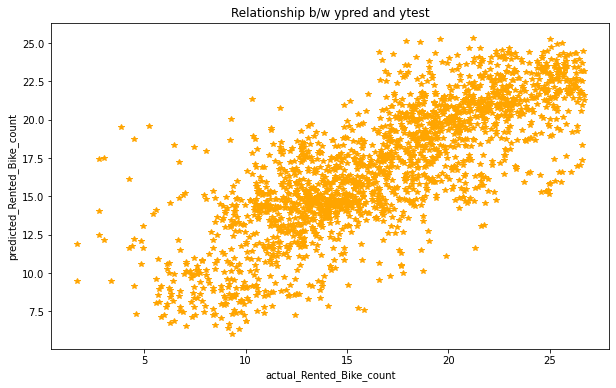

In [83]:
#Check the relationship b/w ypredict and ytest
plt.plot(ytest,ypred_ols,'*',color='orange')
plt.title('Relationship b/w ypred and ytest')
plt.xlabel('actual_Rented_Bike_count')
plt.ylabel('predicted_Rented_Bike_count')
plt.show()

In [84]:
#Statistical test to check the linearity
from statsmodels.stats.diagnostic import linear_rainbow 
print('% of Linearity:',linear_rainbow(res=linear_model_using_ols,frac=0.5)[1]*100)

% of Linearity: 79.3031021526479


In [85]:
#Normality

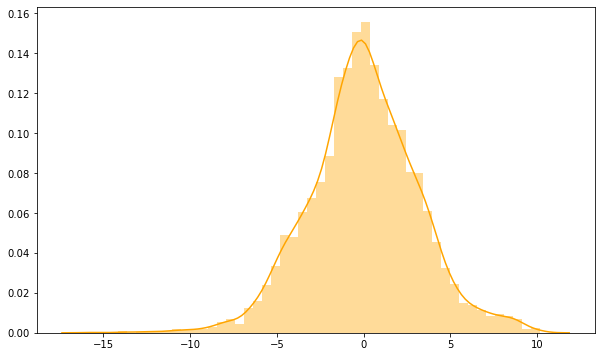

In [86]:
#plot the distribution of residual
sns.distplot(linear_model_using_ols.resid,color='orange')
plt.show()

In [87]:
#Check skewness
print('Skewness of residual is :',linear_model_using_ols.resid.skew())

Skewness of residual is : -0.0696385869678878


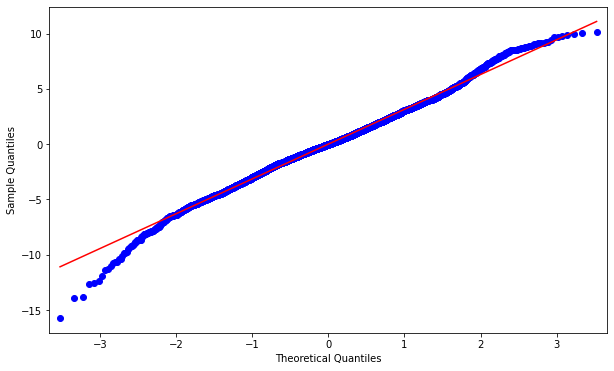

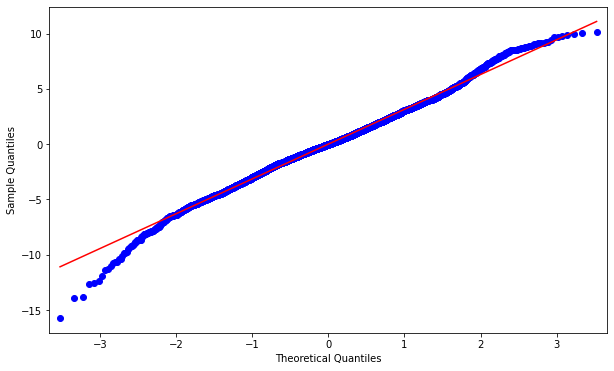

In [88]:
#Using qqplot
from statsmodels.graphics.gofplots import qqplot
qqplot(linear_model_using_ols.resid,line='r')   #r=regression line
#check

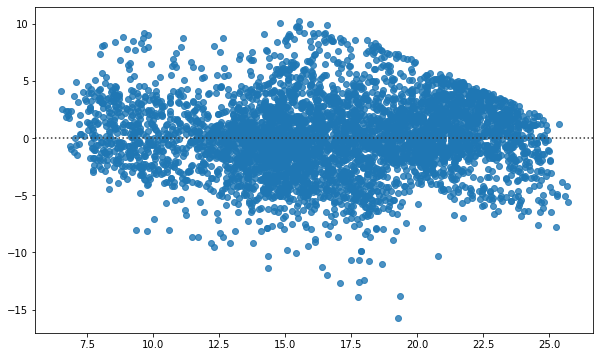

In [89]:
#Find the Homascadasticity
sns.residplot(linear_model_using_ols.predict(),linear_model_using_ols.resid)
plt.show()

In [90]:
#statsitic test for homascadsticity
from statsmodels.stats.api import het_goldfeldquandt

#H0: model is homascadsticity
print('Pvalue is :',het_goldfeldquandt(linear_model_using_ols.resid,linear_model_using_ols.model.exog)[1])

Pvalue is : 0.41130046943276294


In [91]:
#Feature selection

In [92]:
inpv1.head(2)

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Solar Radiation (MJ/m2),day,Holiday_No Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,year_2017
6325,-0.038019,-0.020815,-0.462434,-0.868257,0.614985,1.846439,14,1,1,0,0,0,0
721,-1.144009,-0.985749,-0.780966,-1.297295,-0.345789,-0.634522,1,1,0,0,0,1,0


In [93]:
inpv_1=inpv1.copy()

In [94]:
#import library
from mlxtend.feature_selection import SequentialFeatureSelector as sfs

In [95]:
#a) Backward elimination method

In [96]:
lr=LinearRegression()
lr_back=sfs(estimator=lr,k_features='best',forward=False) #k_features='best' gives significant features among all the features
sfs_back=lr_back.fit(inpv_1,ytrain)
back_feat=sfs_back.k_feature_names_
back_feat=list(back_feat)
print('These are the significant features for best model by considering backward_elimin :','\n',back_feat)

These are the significant features for best model by considering backward_elimin : 
 ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Solar Radiation (MJ/m2)', 'Holiday_No Holiday', 'Seasons_Autumn', 'Seasons_Spring', 'Seasons_Summer', 'Seasons_Winter', 'year_2017']


In [97]:
#Check score
print('Score of backward elimination :',sfs_back.k_score_)

Score of backward elimination : 0.6352624135142714


In [98]:
 #Forward selection method

In [99]:
lr=LinearRegression()
lr_forw=sfs(estimator=lr,k_features='best',forward=True)   
sfs_forw=lr_forw.fit(inpv_1,ytrain)
forw_feat=sfs_forw.k_feature_names_
forw_feat=list(forw_feat)
print('These are the significant features for best model by considering forward_selec :','\n',forw_feat)

These are the significant features for best model by considering forward_selec : 
 ['Hour', 'Temperature(°C)', 'Humidity(%)', 'Solar Radiation (MJ/m2)', 'Holiday_No Holiday', 'Seasons_Autumn', 'Seasons_Winter', 'year_2017']


In [100]:
#Check score
print('Score of forward selection :',sfs_forw.k_score_)

Score of forward selection : 0.6352727695699141


In [101]:
#RFE-Recursive feature elimination

In [102]:
lr=LinearRegression()
from sklearn.feature_selection import RFECV       #its gives possible features so thats why we dont need to write n_features_to_select
rfe_mod=RFECV(estimator=lr)
rfe_feat=rfe_mod.fit(inpv_1,ytrain)

rank=pd.DataFrame()
rank['Rank']=rfe_feat.ranking_
rank['Feature']=inpv_1.columns

r_feat=rank[rank['Rank']==1]

In [103]:
#print features
rfe_featu=r_feat['Feature']
print('These are the significant features for best model by considering RFE :','\n',rfe_featu)

These are the significant features for best model by considering RFE : 
 0                   Hour
1        Temperature(°C)
2            Humidity(%)
7     Holiday_No Holiday
8         Seasons_Autumn
11        Seasons_Winter
12             year_2017
Name: Feature, dtype: object


In [104]:
#Check score
print('Score of RFECV method :',np.mean(rfe_feat.grid_scores_))

Score of RFECV method : 0.5902715260908006


In [105]:
#model-5 model with best features using backward elimination


In [106]:
import statsmodels.api as sm

inpc2=sm.add_constant(inpv_1[back_feat])
ols=sm.OLS(ytrain,inpc2)
linear_model_using_ols_best_feat=ols.fit() 
print(linear_model_using_ols_best_feat.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.638
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     910.8
Date:                Fri, 05 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:08:40   Log-Likelihood:                -11987.
No. Observations:                4668   AIC:                         2.399e+04
Df Residuals:                    4658   BIC:                         2.406e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [107]:
sign_feat=list(inpv_1[back_feat].columns)  #bcoz we need to consider only best features obtained from backward elimination


from statsmodels.api import add_constant
xtest_with_constant=add_constant(xtest[sign_feat],has_constant='add')
ypred_ols=linear_model_using_ols_best_feat.predict(xtest_with_constant)
ypred_ols.shape

(2001,)

In [108]:
#find Performance
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tools.eval_measures import rmse

#rmse
ols_rmse=np.sqrt(mean_squared_error(ytest,ypred_ols))
#r2_score
ols_r2=r2_score(ytest,ypred_ols)
#adj_r2_score
ols_adj_r2=1-(((1-ols_r2)*(len(xtest[sign_feat])-1))/(len(xtest[sign_feat])-len(xtest[sign_feat].columns)-1))

print('rmse:',ols_rmse,'\n','r2_score:',ols_r2,'\n','adj_r2:',ols_adj_r2)

rmse: 3.2609340135695932 
 r2_score: 0.6163789107117214 
 adj_r2: 0.6144511665444435


In [109]:
linreg_model_with_signifi_feat_using_backward_elimin = pd.Series({
                     'Model_Name': "LRM_signif_feat_using_backward_elimin",
                     'RMSE':ols_rmse,
                     'R-Squared':ols_r2 ,
                     'Adj. R-Squared': ols_adj_r2     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat_using_backward_elimin, ignore_index=True)

#call scorecard
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,LRM_using _OLS,0.540043,0.536100,404.821
1,LRM_using_sklearn,0.540043,0.536100,404.821
2,LRM_full_with_transformed_Rented_bike_Count,0.616574,0.613287,[3.260103987675528]
3,LRM_with_Signf_feat,0.616360,0.613850,3.26101
4,LRM_signif_feat_using_backward_elimin,0.616379,0.614451,3.26093


In [110]:
#model-6 model with best features using RFE method

In [111]:
#Build a model
inpc3=sm.add_constant(inpv_1[rfe_featu])
ols=sm.OLS(ytrain,inpc3)
linear_model_using_ols_best_feat_RFE=ols.fit() 
print(linear_model_using_ols_best_feat_RFE.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.637
Model:                            OLS   Adj. R-squared:                  0.637
Method:                 Least Squares   F-statistic:                     1170.
Date:                Fri, 05 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:08:40   Log-Likelihood:                -11988.
No. Observations:                4668   AIC:                         2.399e+04
Df Residuals:                    4660   BIC:                         2.404e+04
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 15.3504      0

In [112]:
sign_feat=list(inpv_1[rfe_featu].columns)  #bcoz we need to consider only best features obtained from RFE method


from statsmodels.api import add_constant
xtest_with_constant=add_constant(xtest[sign_feat],has_constant='add')
ypred_ols=linear_model_using_ols_best_feat_RFE.predict(xtest_with_constant)
ypred_ols.shape

(2001,)

In [113]:
#find Performance
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tools.eval_measures import rmse

#rmse
ols_rmse=np.sqrt(mean_squared_error(ytest,ypred_ols))
#r2_score
ols_r2=r2_score(ytest,ypred_ols)
#adj_r2_score
ols_adj_r2=1-(((1-ols_r2)*(len(xtest[sign_feat])-1))/(len(xtest[sign_feat])-len(xtest[sign_feat].columns)-1))

print('rmse:',ols_rmse,'\n','r2_score:',ols_r2,'\n','adj_r2:',ols_adj_r2)

rmse: 3.2629269518611705 
 r2_score: 0.6159098630220092 
 adj_r2: 0.6145608259127038


In [114]:
linreg_model_with_signifi_feat_using_RFECV_method = pd.Series({
                     'Model_Name': "LRM_with_signif_feat_using_RFECV",
                     'RMSE':ols_rmse,
                     'R-Squared':ols_r2 ,
                     'Adj. R-Squared': ols_adj_r2     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat_using_RFECV_method , ignore_index=True)

#call scorecard
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,LRM_using _OLS,0.540043,0.536100,404.821
1,LRM_using_sklearn,0.540043,0.536100,404.821
2,LRM_full_with_transformed_Rented_bike_Count,0.616574,0.613287,[3.260103987675528]
3,LRM_with_Signf_feat,0.616360,0.613850,3.26101
4,LRM_signif_feat_using_backward_elimin,0.616379,0.614451,3.26093
5,LRM_with_signif_feat_using_RFECV,0.615910,0.614561,3.26293


In [115]:
#Interaction effect (Joint effect)

In [116]:
# Interaction effect with backward elimination

In [117]:
inpv_1_back=inpv_1[back_feat]
inpv_1_back.head(2)

,Hour,Temperature(°C),Humidity(%),Solar Radiation (MJ/m2),Holiday_No Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,year_2017
6325,-0.038019,-0.020815,-0.462434,1.846439,1,1,0,0,0,0
721,-1.144009,-0.985749,-0.780966,-0.634522,1,0,0,0,1,0


In [118]:
#concatenate ytrain and inpv_1_back[back_feat]
inpv_1_back=pd.concat([inpv_1_back,ytrain],axis=1)
inpv_1_back.rename({0: 'Rented Bike Count'}, axis=1, inplace=True)
inpv_1_back.head(2)
#check

,Hour,Temperature(°C),Humidity(%),Solar Radiation (MJ/m2),Holiday_No Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,year_2017,Rented Bike Count
6325,-0.038019,-0.020815,-0.462434,1.846439,1,1,0,0,0,0,19.583559
721,-1.144009,-0.985749,-0.780966,-0.634522,1,0,0,0,1,0,7.134962


In [119]:
#bring to one scale form
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
inpv_1_back['Rented Bike Count']=sc.fit_transform(inpv_1_back['Rented Bike Count'].values.reshape(-1,1))
inpv_1_back.head(2)

,Hour,Temperature(°C),Humidity(%),Solar Radiation (MJ/m2),Holiday_No Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,year_2017,Rented Bike Count
6325,-0.038019,-0.020815,-0.462434,1.846439,1,1,0,0,0,0,0.533058
721,-1.144009,-0.985749,-0.780966,-0.634522,1,0,0,0,1,0,-1.842300


In [120]:
inpv_2_back=inpv_1_back.copy()

In [121]:
inpv_2_back['Hour*Temp']=inpv_2_back['Temperature(°C)']*inpv_2_back['Hour']

In [122]:
inpv_2_back.head(2)

,Hour,Temperature(°C),Humidity(%),Solar Radiation (MJ/m2),Holiday_No Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,year_2017,Rented Bike Count,Hour*Temp
6325,-0.038019,-0.020815,-0.462434,1.846439,1,1,0,0,0,0,0.533058,0.000791
721,-1.144009,-0.985749,-0.780966,-0.634522,1,0,0,0,1,0,-1.842300,1.127707


In [123]:
inpv_2_back_d=inpv_2_back.drop(['Rented Bike Count'],1)

In [124]:
inpv_2_back_d.head()

,Hour,Temperature(°C),Humidity(%),Solar Radiation (MJ/m2),Holiday_No Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,year_2017,Hour*Temp
6325,-0.038019,-0.020815,-0.462434,1.846439,1,1,0,0,0,0,0.000791
721,-1.144009,-0.985749,-0.780966,-0.634522,1,0,0,0,1,0,1.127707
4283,-0.867512,1.374894,0.864782,-0.634522,1,0,0,1,0,0,-1.192737
2241,-0.314517,-0.063892,-0.356257,0.659892,1,0,1,0,0,0,0.020095
6014,-1.420507,-0.623899,1.342580,-0.634522,1,1,0,0,0,0,0.886253


In [125]:
#Build a model 
import statsmodels.api as sm

inpc4=sm.add_constant(inpv_2_back_d)
ols=sm.OLS(ytrain,inpc4)
linear_model_using_ols_best_feat_backward_with_interaction=ols.fit() 
print(linear_model_using_ols_best_feat_backward_with_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     847.4
Date:                Fri, 05 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:08:42   Log-Likelihood:                -11936.
No. Observations:                4668   AIC:                         2.389e+04
Df Residuals:                    4657   BIC:                         2.397e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
const                     

In [126]:
#same we need for test also#check
xtest[back_feat].head(2)

,Hour,Temperature(°C),Humidity(%),Solar Radiation (MJ/m2),Holiday_No Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,year_2017
4266,-0.176268,1.728129,-0.196991,1.599884,1,0,0,1,0,0
1502,1.620967,-1.020211,0.811694,-0.634522,1,0,0,0,1,0


In [127]:
xtest_backward=pd.concat([xtest[back_feat],ytest],axis=1)
xtest_backward.rename({0: 'Rented Bike Count'}, axis=1, inplace=True)
xtest_backward.head(2)


,Hour,Temperature(°C),Humidity(%),Solar Radiation (MJ/m2),Holiday_No Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,year_2017,Rented Bike Count
4266,-0.176268,1.728129,-0.196991,1.599884,1,0,0,1,0,0,17.304903
1502,1.620967,-1.020211,0.811694,-0.634522,1,0,0,0,1,0,12.193559


In [128]:
#bring to one scale form
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtest_backward['Rented Bike Count']=sc.fit_transform(xtest_backward['Rented Bike Count'].values.reshape(-1,1))
xtest_backward.head(2)

,Hour,Temperature(°C),Humidity(%),Solar Radiation (MJ/m2),Holiday_No Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,year_2017,Rented Bike Count
4266,-0.176268,1.728129,-0.196991,1.599884,1,0,0,1,0,0,0.121463
1502,1.620967,-1.020211,0.811694,-0.634522,1,0,0,0,1,0,-0.849370


In [129]:
xtest_backward_1=xtest_backward.copy()

In [130]:
xtest_backward_1['Hour*Temp']=xtest_backward['Temperature(°C)']*xtest_backward['Hour']

In [131]:
xtest_backward_1.head(2)

,Hour,Temperature(°C),Humidity(%),Solar Radiation (MJ/m2),Holiday_No Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,year_2017,Rented Bike Count,Hour*Temp
4266,-0.176268,1.728129,-0.196991,1.599884,1,0,0,1,0,0,0.121463,-0.304614
1502,1.620967,-1.020211,0.811694,-0.634522,1,0,0,0,1,0,-0.849370,-1.653729


In [132]:
xtest_backward_2=xtest_backward_1.drop('Rented Bike Count',1)

In [133]:
from statsmodels.api import add_constant
xtest_with_constant=add_constant(xtest_backward_2,has_constant='add')
ypred_ols=linear_model_using_ols_best_feat_backward_with_interaction.predict(xtest_with_constant)
ypred_ols.shape

(2001,)

In [134]:
#find Performance
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tools.eval_measures import rmse

#rmse
ols_rmse=np.sqrt(mean_squared_error(ytest,ypred_ols))
#r2_score
ols_r2=r2_score(ytest,ypred_ols)
#adj_r2_score
ols_adj_r2=1-(((1-ols_r2)*(len(xtest_backward)-1))/(len(xtest_backward)-len(xtest_backward.columns)-1))

print('rmse:',ols_rmse,'\n','r2_score:',ols_r2,'\n','adj_r2:',ols_adj_r2)

rmse: 3.2199805043444476 
 r2_score: 0.625954066912821 
 adj_r2: 0.6238854368153051


In [135]:
linreg_model_with_signifi_feat_backwrd_interaction = pd.Series({
                     'Model_Name': "LRM_with_signif_feat_Backwrd_Intrctn",
                     'RMSE':ols_rmse,
                     'R-Squared':ols_r2 ,
                     'Adj. R-Squared': ols_adj_r2     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat_backwrd_interaction , ignore_index=True)

#call scorecard
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,LRM_using _OLS,0.540043,0.536100,404.821
1,LRM_using_sklearn,0.540043,0.536100,404.821
2,LRM_full_with_transformed_Rented_bike_Count,0.616574,0.613287,[3.260103987675528]
3,LRM_with_Signf_feat,0.616360,0.613850,3.26101
4,LRM_signif_feat_using_backward_elimin,0.616379,0.614451,3.26093
5,LRM_with_signif_feat_using_RFECV,0.615910,0.614561,3.26293
6,LRM_with_signif_feat_Backwrd_Intrctn,0.625954,0.623885,3.21998


In [136]:
#Interaction effect with RFECV method

In [137]:
inpv_1_rfe=inpv_1[rfe_featu]
inpv_1_rfe.head(2)

,Hour,Temperature(°C),Humidity(%),Holiday_No Holiday,Seasons_Autumn,Seasons_Winter,year_2017
6325,-0.038019,-0.020815,-0.462434,1,1,0,0
721,-1.144009,-0.985749,-0.780966,1,0,1,0


In [138]:
#concatenate ytrain and inpv_1_rfe[back_feat]
inpv_1_rfe=pd.concat([inpv_1_rfe,ytrain],axis=1)
inpv_1_rfe.rename({0: 'Rented Bike Count'}, axis=1, inplace=True)
inpv_1_rfe.head(2)

,Hour,Temperature(°C),Humidity(%),Holiday_No Holiday,Seasons_Autumn,Seasons_Winter,year_2017,Rented Bike Count
6325,-0.038019,-0.020815,-0.462434,1,1,0,0,19.583559
721,-1.144009,-0.985749,-0.780966,1,0,1,0,7.134962


In [139]:
#bring to one scale form
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
inpv_1_rfe['Rented Bike Count']=sc.fit_transform(inpv_1_rfe['Rented Bike Count'].values.reshape(-1,1))
inpv_1_rfe.head(2)

,Hour,Temperature(°C),Humidity(%),Holiday_No Holiday,Seasons_Autumn,Seasons_Winter,year_2017,Rented Bike Count
6325,-0.038019,-0.020815,-0.462434,1,1,0,0,0.533058
721,-1.144009,-0.985749,-0.780966,1,0,1,0,-1.842300


In [140]:
inpv_2_rfe=inpv_1_rfe.copy()

In [141]:
inpv_2_rfe['Hour*Temp']=inpv_2_rfe['Temperature(°C)']*inpv_2_rfe['Hour']

In [142]:
inpv_2_rfe=inpv_2_rfe.drop('Rented Bike Count',1)
inpv_2_rfe.head(2)

,Hour,Temperature(°C),Humidity(%),Holiday_No Holiday,Seasons_Autumn,Seasons_Winter,year_2017,Hour*Temp
6325,-0.038019,-0.020815,-0.462434,1,1,0,0,0.000791
721,-1.144009,-0.985749,-0.780966,1,0,1,0,1.127707


In [143]:
#model-8 interaction effect of price difference with rfe method

In [144]:
#Build a model 
import statsmodels.api as sm

inpc5=sm.add_constant(inpv_2_rfe)
ols=sm.OLS(ytrain,inpc5)
linear_model_using_ols_best_feat_RFECV_with_interaction=ols.fit() 
print(linear_model_using_ols_best_feat_RFECV_with_interaction.summary())

                            OLS Regression Results                            
Dep. Variable:                      0   R-squared:                       0.645
Model:                            OLS   Adj. R-squared:                  0.645
Method:                 Least Squares   F-statistic:                     1059.
Date:                Fri, 05 Mar 2021   Prob (F-statistic):               0.00
Time:                        13:08:44   Log-Likelihood:                -11938.
No. Observations:                4668   AIC:                         2.389e+04
Df Residuals:                    4659   BIC:                         2.395e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 15.3615      0

In [145]:
#same we need for test also
xtest[rfe_featu].head(2)

,Hour,Temperature(°C),Humidity(%),Holiday_No Holiday,Seasons_Autumn,Seasons_Winter,year_2017
4266,-0.176268,1.728129,-0.196991,1,0,0,0
1502,1.620967,-1.020211,0.811694,1,0,1,0


In [146]:
#concatenate
xtest_rfe=pd.concat([xtest[rfe_featu],ytest],axis=1)
xtest_rfe.rename({0: 'Rented Bike Count'}, axis=1, inplace=True)
xtest_rfe.head(2)

,Hour,Temperature(°C),Humidity(%),Holiday_No Holiday,Seasons_Autumn,Seasons_Winter,year_2017,Rented Bike Count
4266,-0.176268,1.728129,-0.196991,1,0,0,0,17.304903
1502,1.620967,-1.020211,0.811694,1,0,1,0,12.193559


In [147]:
#bring to one scale form
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtest_rfe['Rented Bike Count']=sc.fit_transform(xtest_rfe['Rented Bike Count'].values.reshape(-1,1))
xtest_rfe.head(2)

,Hour,Temperature(°C),Humidity(%),Holiday_No Holiday,Seasons_Autumn,Seasons_Winter,year_2017,Rented Bike Count
4266,-0.176268,1.728129,-0.196991,1,0,0,0,0.121463
1502,1.620967,-1.020211,0.811694,1,0,1,0,-0.849370


In [148]:
xtest_rfe_1=xtest_rfe.copy()
xtest_rfe_1['Hour*Temperature']=xtest_rfe['Hour']*xtest_rfe['Temperature(°C)']
xtest_rfe_1=xtest_rfe_1.drop('Rented Bike Count',1)
xtest_rfe_1.head(2)

,Hour,Temperature(°C),Humidity(%),Holiday_No Holiday,Seasons_Autumn,Seasons_Winter,year_2017,Hour*Temperature
4266,-0.176268,1.728129,-0.196991,1,0,0,0,-0.304614
1502,1.620967,-1.020211,0.811694,1,0,1,0,-1.653729


In [149]:
from statsmodels.api import add_constant
xtest_with_constant=add_constant(xtest_rfe_1)
ypred_ols=linear_model_using_ols_best_feat_RFECV_with_interaction.predict(xtest_with_constant)
ypred_ols.shape

(2001,)

In [150]:
#find Performance
from sklearn.metrics import r2_score,mean_squared_error
from statsmodels.tools.eval_measures import rmse

#rmse
ols_rmse=np.sqrt(mean_squared_error(ytest,ypred_ols))
#r2_score
ols_r2=r2_score(ytest,ypred_ols)
#adj_r2_score
ols_adj_r2=1-(((1-ols_r2)*(len(xtest_backward)-1))/(len(xtest_backward)-len(xtest_backward.columns)-1))

print('rmse:',ols_rmse,'\n','r2_score:',ols_r2,'\n','adj_r2:',ols_adj_r2)

rmse: 3.222143647221483 
 r2_score: 0.6254513392898551 
 adj_r2: 0.6233799288987985


In [151]:
linreg_model_with_signifi_feat_RFECV_interaction = pd.Series({
                     'Model_Name': "LRM_with_signif_feat_RFECV_intrctn",
                     'RMSE':ols_rmse,
                     'R-Squared':ols_r2 ,
                     'Adj. R-Squared': ols_adj_r2     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat_RFECV_interaction , ignore_index=True)

#call scorecard
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,LRM_using _OLS,0.540043,0.536100,404.821
1,LRM_using_sklearn,0.540043,0.536100,404.821
2,LRM_full_with_transformed_Rented_bike_Count,0.616574,0.613287,[3.260103987675528]
3,LRM_with_Signf_feat,0.616360,0.613850,3.26101
4,LRM_signif_feat_using_backward_elimin,0.616379,0.614451,3.26093
5,LRM_with_signif_feat_using_RFECV,0.615910,0.614561,3.26293
6,LRM_with_signif_feat_Backwrd_Intrctn,0.625954,0.623885,3.21998
7,LRM_with_signif_feat_RFECV_intrctn,0.625451,0.623380,3.22214


In [152]:
#Optimisation

In [153]:
#Cross Validation

In [154]:
inp=final_data
out=box_out

In [155]:
#import library
from sklearn.model_selection import cross_val_score,KFold

kf=KFold(n_splits=5,shuffle=True,random_state=48)


#use r2 score
from sklearn.linear_model import LinearRegression     #split the dataset into 5 groups
lr=LinearRegression()
res=cross_val_score(lr,inp,out,cv=kf,scoring='r2')
print('R2 values for 5sets of dataset :',res ) 

R2 values for 5sets of dataset : [0.60174006 0.63902452 0.62380134 0.62610435 0.65875589]


In [156]:
#bias error
be=1-np.mean(res)

#variance error
ve=np.std(res)

print('Bias error interms of R2:',be)
print('Varaince error interms of R2:',ve)      #std(res)=0 model if free of overfitting 

Bias error interms of R2: 0.3701147687207248
Varaince error interms of R2: 0.01876433202950037


In [157]:
# Dataset is having overfitting problem... to overcome this we can use regualarization 

In [158]:
 #Regularization with Hyperparameter

In [159]:
#import hyperparameter library
from sklearn.model_selection import GridSearchCV 
#import regularization library
from sklearn.linear_model import Lasso,Ridge,ElasticNet

In [160]:
#Lasso Regularization

In [161]:
loss=Lasso()     #hyper paramater of lasso is alpha
param={'alpha':[0.000001,0.00001,0.0001,0.001,0.01,0.1,1,2,5,8,10,50,60,70,90,100]}

grid=GridSearchCV(loss,param_grid=param,cv=5,scoring='r2') 

hyp_rid=grid.fit(inpv_2_rfe,ytrain)

print('Best hyperparameter is :',hyp_rid.best_params_ )
print('Score :',hyp_rid.best_score_ )

Best hyperparameter is : {'alpha': 0.0001}
Score : 0.6429553789655905


In [162]:
#Ridge Regularization

In [163]:
rid=Ridge()     #hyper paramater of ridge is alpha
param={'alpha':[0.000001,0.00001,0.0001,0.001,0.01,0.1,1,2,5,8,10,50,60,70,90,100]}

grid=GridSearchCV(rid,param_grid=param,cv=5,scoring='r2')

hyp_rid=grid.fit(inpv_2_rfe,ytrain)

print('Best hyperparameter is :',hyp_rid.best_params_ )
print('Score :',hyp_rid.best_score_ )


Best hyperparameter is : {'alpha': 5}
Score : 0.6429700719109663


In [164]:
#ElasticNet Regularization

In [165]:
enet=ElasticNet()     #hyper paramater of elastic  is alpha and l1_ratio
param={'alpha':[0.000001,0.00001,0.0001,0.001,0.01,0.1,1,2,5,8,10,50,60,70,90,100],'l1_ratio':[0.1,.2,0.3,0.4,.5,0.6,0.7,0.8,0.9]}

grid=GridSearchCV(enet,param_grid=param,cv=5,scoring='r2')

hyp_rid=grid.fit(inpv_2_rfe,ytrain)

print('Best hyperparameter is :',hyp_rid.best_params_ )
print('Score :',hyp_rid.best_score_ )

Best hyperparameter is : {'alpha': 0.001, 'l1_ratio': 0.1}
Score : 0.6429672559360472


In [166]:
#model-9  building a model using Ridge regularization

In [167]:
rid=Ridge(alpha=8)                 
rid.fit(inpv_2_rfe,ytrain)

ypred_train=rid.predict(inpv_2_rfe)
ypred_test=rid.predict(xtest_rfe)

rmse_train=np.sqrt(mean_squared_error(ytrain,ypred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,ypred_test))

r2_train=r2_score(ytrain,ypred_train)
r2_test=r2_score(ytest,ypred_test)

adj_r2_train=1-(((1-r2_train)*(len(inpv_2_rfe)-1))/(len(inpv_2_rfe)-len(inpv_2_rfe.columns)-1))
adj_r2_test=1-(((1-r2_test)*(len(xtest_rfe)-1))/(len(xtest_rfe)-len(xtest_rfe.columns)-1))

print('rmse_train:',rmse_train,'\n','rmse_test:',rmse_test,'\n','r2_score_train:',r2_train,'\n','r2_score_test:',r2_test,'\n','adj_r2_train:',adj_r2_train,'\n','adj_r2_test:',adj_r2_test)

rmse_train: 3.1220697723453283 
 rmse_test: 2.9990222063082492 
 r2_score_train: 0.6451028803576659 
 r2_score_test: 0.67552755922539 
 adj_r2_train: 0.6444934841445003 
 adj_r2_test: 0.6742244570536045


In [168]:
linreg_model_with_signifi_feat_RFECV_interaction_ridge = pd.Series({
                     'Model_Name': "LRM_with_signif_feat_RFECV_interctn_Ridge",
                     'RMSE':rmse_test,
                     'R-Squared':r2_test ,
                     'Adj. R-Squared': adj_r2_test     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat_RFECV_interaction_ridge , ignore_index=True)

#call scorecard
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,LRM_using _OLS,0.540043,0.536100,404.821
1,LRM_using_sklearn,0.540043,0.536100,404.821
2,LRM_full_with_transformed_Rented_bike_Count,0.616574,0.613287,[3.260103987675528]
3,LRM_with_Signf_feat,0.616360,0.613850,3.26101
4,LRM_signif_feat_using_backward_elimin,0.616379,0.614451,3.26093
5,LRM_with_signif_feat_using_RFECV,0.615910,0.614561,3.26293
6,LRM_with_signif_feat_Backwrd_Intrctn,0.625954,0.623885,3.21998
7,LRM_with_signif_feat_RFECV_intrctn,0.625451,0.623380,3.22214
8,LRM_with_signif_feat_RFECV_interctn_Ridge,0.675528,0.674224,2.99902


In [169]:
#Stochastic Gradient Descent

In [170]:
#import library
from sklearn.linear_model import SGDRegressor

In [171]:
sgd=SGDRegressor()
sgd.fit(inpv_2_rfe,ytrain)


ypred_train=sgd.predict(inpv_2_rfe)
ypred_test=sgd.predict(xtest_rfe)

rmse_train=np.sqrt(mean_squared_error(ytrain,ypred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,ypred_test))

r2_train=r2_score(ytrain,ypred_train)
r2_test=r2_score(ytest,ypred_test)

adj_r2_train=1-(((1-r2_train)*(len(inpv_2_rfe)-1))/(len(inpv_2_rfe)-len(inpv_2_rfe.columns)-1))
adj_r2_test=1-(((1-r2_test)*(len(xtest_rfe)-1))/(len(xtest_rfe)-len(xtest_rfe.columns)-1))

print('rmse_train:',rmse_train,'\n','rmse_test:',rmse_test,'\n','r2_score_train:',r2_train,'\n','r2_score_test:',r2_test,'\n','adj_r2_train:',adj_r2_train,'\n','adj_r2_test:',adj_r2_test)

rmse_train: 3.123881102936052 
 rmse_test: 3.005177748200676 
 r2_score_train: 0.6446909597195798 
 r2_score_test: 0.6741942223483908 
 adj_r2_train: 0.6440808561947369 
 adj_r2_test: 0.6728857654100309


In [172]:
linreg_model_with_signifi_feat_RFECV_interaction_sgd = pd.Series({
                     'Model_Name': "LRM_with_signif_feat_RFECV_intrctn_SGD",
                     'RMSE':rmse_test,
                     'R-Squared':r2_test ,
                     'Adj. R-Squared': adj_r2_test     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat_RFECV_interaction_sgd  , ignore_index=True)

#call scorecard
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,LRM_using _OLS,0.540043,0.536100,404.821
1,LRM_using_sklearn,0.540043,0.536100,404.821
2,LRM_full_with_transformed_Rented_bike_Count,0.616574,0.613287,[3.260103987675528]
3,LRM_with_Signf_feat,0.616360,0.613850,3.26101
4,LRM_signif_feat_using_backward_elimin,0.616379,0.614451,3.26093
5,LRM_with_signif_feat_using_RFECV,0.615910,0.614561,3.26293
6,LRM_with_signif_feat_Backwrd_Intrctn,0.625954,0.623885,3.21998
7,LRM_with_signif_feat_RFECV_intrctn,0.625451,0.623380,3.22214
8,LRM_with_signif_feat_RFECV_interctn_Ridge,0.675528,0.674224,2.99902
9,LRM_with_signif_feat_RFECV_intrctn_SGD,0.674194,0.672886,3.00518


In [173]:
#SVM Algorithm

In [174]:
from sklearn import svm
model=svm.SVR()
model.fit(inpv_2_rfe,ytrain)


ypred_train=model.predict(inpv_2_rfe)
ypred_test=model.predict(xtest_rfe)

rmse_train=np.sqrt(mean_squared_error(ytrain,ypred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,ypred_test))

r2_train=r2_score(ytrain,ypred_train)
r2_test=r2_score(ytest,ypred_test)

adj_r2_train=1-(((1-r2_train)*(len(inpv_2_rfe)-1))/(len(inpv_2_rfe)-len(inpv_2_rfe.columns)-1))
adj_r2_test=1-(((1-r2_test)*(len(xtest_rfe)-1))/(len(xtest_rfe)-len(xtest_rfe.columns)-1))

print('rmse_train:',rmse_train,'\n','rmse_test:',rmse_test,'\n','r2_score_train:',r2_train,'\n','r2_score_test:',r2_test,'\n','adj_r2_train:',adj_r2_train,'\n','adj_r2_test:',adj_r2_test)




rmse_train: 2.660025999335901 
 rmse_test: 3.3164577783102214 
 r2_score_train: 0.7423743926724815 
 r2_score_test: 0.6032038971756708 
 adj_r2_train: 0.7419320220224235 
 adj_r2_test: 0.60161033852979


In [175]:
linreg_model_with_signifi_feat_RFECV_interaction_SVM = pd.Series({
                     'Model_Name': "LRM_with_signif_feat_RFECV_intrctn_SVM",
                     'RMSE':rmse_test,
                     'R-Squared':r2_test ,
                     'Adj. R-Squared': adj_r2_test     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat_RFECV_interaction_SVM  , ignore_index=True)

#call scorecard
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,LRM_using _OLS,0.540043,0.536100,404.821
1,LRM_using_sklearn,0.540043,0.536100,404.821
2,LRM_full_with_transformed_Rented_bike_Count,0.616574,0.613287,[3.260103987675528]
3,LRM_with_Signf_feat,0.616360,0.613850,3.26101
4,LRM_signif_feat_using_backward_elimin,0.616379,0.614451,3.26093
5,LRM_with_signif_feat_using_RFECV,0.615910,0.614561,3.26293
6,LRM_with_signif_feat_Backwrd_Intrctn,0.625954,0.623885,3.21998
7,LRM_with_signif_feat_RFECV_intrctn,0.625451,0.623380,3.22214
8,LRM_with_signif_feat_RFECV_interctn_Ridge,0.675528,0.674224,2.99902
9,LRM_with_signif_feat_RFECV_intrctn_SGD,0.674194,0.672886,3.00518


In [176]:
#Automatic Relevance Determination Regression (ARD) Algorithm

In [177]:
from sklearn.linear_model import ARDRegression

In [178]:
model=ARDRegression()
model.fit(inpv_2_rfe,ytrain)

ARDRegression()

In [179]:
ypred_train=model.predict(inpv_2_rfe)
ypred_test=model.predict(xtest_rfe)

rmse_train=np.sqrt(mean_squared_error(ytrain,ypred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,ypred_test))

r2_train=r2_score(ytrain,ypred_train)
r2_test=r2_score(ytest,ypred_test)

adj_r2_train=1-(((1-r2_train)*(len(inpv_2_rfe)-1))/(len(inpv_2_rfe)-len(inpv_2_rfe.columns)-1))
adj_r2_test=1-(((1-r2_test)*(len(xtest_rfe)-1))/(len(xtest_rfe)-len(xtest_rfe.columns)-1))

print('rmse_train:',rmse_train,'\n','rmse_test:',rmse_test,'\n','r2_score_train:',r2_train,'\n','r2_score_test:',r2_test,'\n','adj_r2_train:',adj_r2_train,'\n','adj_r2_test:',adj_r2_test)

rmse_train: 3.1220170004203394 
 rmse_test: 3.0016868087298842 
 r2_score_train: 0.6451148778127253 
 r2_score_test: 0.6749507217884412 
 adj_r2_train: 0.6445055022004698 
 adj_r2_test: 0.673645303000443


In [180]:
linreg_model_with_signifi_feat_RFECV_interaction_ARD = pd.Series({
                     'Model_Name': "LRM_with_signif_feat_RFECV_intrctn_ARD",
                     'RMSE':rmse_test,
                     'R-Squared':r2_test ,
                     'Adj. R-Squared': adj_r2_test     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat_RFECV_interaction_ARD  , ignore_index=True)

#call scorecard
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,LRM_using _OLS,0.540043,0.536100,404.821
1,LRM_using_sklearn,0.540043,0.536100,404.821
2,LRM_full_with_transformed_Rented_bike_Count,0.616574,0.613287,[3.260103987675528]
3,LRM_with_Signf_feat,0.616360,0.613850,3.26101
4,LRM_signif_feat_using_backward_elimin,0.616379,0.614451,3.26093
5,LRM_with_signif_feat_using_RFECV,0.615910,0.614561,3.26293
6,LRM_with_signif_feat_Backwrd_Intrctn,0.625954,0.623885,3.21998
7,LRM_with_signif_feat_RFECV_intrctn,0.625451,0.623380,3.22214
8,LRM_with_signif_feat_RFECV_interctn_Ridge,0.675528,0.674224,2.99902
9,LRM_with_signif_feat_RFECV_intrctn_SGD,0.674194,0.672886,3.00518


In [181]:
#Bayesian Ridge Regression Algorithm

In [182]:
from sklearn.linear_model import BayesianRidge

In [183]:
model=BayesianRidge()
model.fit(inpv_2_rfe,ytrain)

ypred_train=model.predict(inpv_2_rfe)
ypred_test=model.predict(xtest_rfe)

rmse_train=np.sqrt(mean_squared_error(ytrain,ypred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,ypred_test))

r2_train=r2_score(ytrain,ypred_train)
r2_test=r2_score(ytest,ypred_test)

adj_r2_train=1-(((1-r2_train)*(len(inpv_2_rfe)-1))/(len(inpv_2_rfe)-len(inpv_2_rfe.columns)-1))
adj_r2_test=1-(((1-r2_test)*(len(xtest_rfe)-1))/(len(xtest_rfe)-len(xtest_rfe.columns)-1))

print('rmse_train:',rmse_train,'\n','rmse_test:',rmse_test,'\n','r2_score_train:',r2_train,'\n','r2_score_test:',r2_test,'\n','adj_r2_train:',adj_r2_train,'\n','adj_r2_test:',adj_r2_test)

rmse_train: 3.122002811107097 
 rmse_test: 2.9994015507777294 
 r2_score_train: 0.6451181036534045 
 r2_score_test: 0.6754454693960875 
 adj_r2_train: 0.6445087335802616 
 adj_r2_test: 0.6741420375462726


In [184]:
linreg_model_with_signifi_feat_RFECV_interaction_BR = pd.Series({
                     'Model_Name': "LRM_with_signif_feat_RFECV_intrctn_BR",
                     'RMSE':rmse_test,
                     'R-Squared':r2_test ,
                     'Adj. R-Squared': adj_r2_test     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat_RFECV_interaction_BR  , ignore_index=True)

#call scorecard
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,LRM_using _OLS,0.540043,0.536100,404.821
1,LRM_using_sklearn,0.540043,0.536100,404.821
2,LRM_full_with_transformed_Rented_bike_Count,0.616574,0.613287,[3.260103987675528]
3,LRM_with_Signf_feat,0.616360,0.613850,3.26101
4,LRM_signif_feat_using_backward_elimin,0.616379,0.614451,3.26093
5,LRM_with_signif_feat_using_RFECV,0.615910,0.614561,3.26293
6,LRM_with_signif_feat_Backwrd_Intrctn,0.625954,0.623885,3.21998
7,LRM_with_signif_feat_RFECV_intrctn,0.625451,0.623380,3.22214
8,LRM_with_signif_feat_RFECV_interctn_Ridge,0.675528,0.674224,2.99902
9,LRM_with_signif_feat_RFECV_intrctn_SGD,0.674194,0.672886,3.00518


In [185]:
#Passive Aggressive Algorithms

In [186]:
from sklearn.linear_model import PassiveAggressiveRegressor

In [187]:
model=PassiveAggressiveRegressor()
model.fit(inpv_2_rfe,ytrain)

ypred_train=model.predict(inpv_2_rfe)
ypred_test=model.predict(xtest_rfe)

rmse_train=np.sqrt(mean_squared_error(ytrain,ypred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,ypred_test))

r2_train=r2_score(ytrain,ypred_train)
r2_test=r2_score(ytest,ypred_test)

adj_r2_train=1-(((1-r2_train)*(len(inpv_2_rfe)-1))/(len(inpv_2_rfe)-len(inpv_2_rfe.columns)-1))
adj_r2_test=1-(((1-r2_test)*(len(xtest_rfe)-1))/(len(xtest_rfe)-len(xtest_rfe.columns)-1))

print('rmse_train:',rmse_train,'\n','rmse_test:',rmse_test,'\n','r2_score_train:',r2_train,'\n','r2_score_test:',r2_test,'\n','adj_r2_train:',adj_r2_train,'\n','adj_r2_test:',adj_r2_test)

rmse_train: 4.246547355722915 
 rmse_test: 3.726936914123061 
 r2_score_train: 0.3434176429660919 
 r2_score_test: 0.4989021542503884 
 adj_r2_train: 0.3422902210179761 
 adj_r2_test: 0.4968897131027996


In [188]:
linreg_model_with_signifi_feat_RFECV_interaction_PAR = pd.Series({
                     'Model_Name': "LRM_with_signif_feat_RFECV_intrctn_PAR",
                     'RMSE':rmse_test,
                     'R-Squared':r2_test ,
                     'Adj. R-Squared': adj_r2_test     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat_RFECV_interaction_PAR  , ignore_index=True)

#call scorecard
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,LRM_using _OLS,0.540043,0.536100,404.821
1,LRM_using_sklearn,0.540043,0.536100,404.821
2,LRM_full_with_transformed_Rented_bike_Count,0.616574,0.613287,[3.260103987675528]
3,LRM_with_Signf_feat,0.616360,0.613850,3.26101
4,LRM_signif_feat_using_backward_elimin,0.616379,0.614451,3.26093
5,LRM_with_signif_feat_using_RFECV,0.615910,0.614561,3.26293
6,LRM_with_signif_feat_Backwrd_Intrctn,0.625954,0.623885,3.21998
7,LRM_with_signif_feat_RFECV_intrctn,0.625451,0.623380,3.22214
8,LRM_with_signif_feat_RFECV_interctn_Ridge,0.675528,0.674224,2.99902
9,LRM_with_signif_feat_RFECV_intrctn_SGD,0.674194,0.672886,3.00518


In [189]:
#Robust Multivariate Regression Algorithms(TheilSenRegressor

In [190]:
from sklearn.linear_model import TheilSenRegressor

In [191]:
model=TheilSenRegressor()
model.fit(inpv_2_rfe,ytrain)

ypred_train=model.predict(inpv_2_rfe)
ypred_test=model.predict(xtest_rfe)

rmse_train=np.sqrt(mean_squared_error(ytrain,ypred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,ypred_test))

r2_train=r2_score(ytrain,ypred_train)
r2_test=r2_score(ytest,ypred_test)

adj_r2_train=1-(((1-r2_train)*(len(inpv_2_rfe)-1))/(len(inpv_2_rfe)-len(inpv_2_rfe.columns)-1))
adj_r2_test=1-(((1-r2_test)*(len(xtest_rfe)-1))/(len(xtest_rfe)-len(xtest_rfe.columns)-1))

print('rmse_train:',rmse_train,'\n','rmse_test:',rmse_test,'\n','r2_score_train:',r2_train,'\n','r2_score_test:',r2_test,'\n','adj_r2_train:',adj_r2_train,'\n','adj_r2_test:',adj_r2_test)

rmse_train: 3.396437933794709 
 rmse_test: 3.3210409263237364 
 r2_score_train: 0.579985163958313 
 r2_score_test: 0.6021064420149684 
 adj_r2_train: 0.5792639536796409 
 adj_r2_test: 0.600508475918643


In [192]:
linreg_model_with_signifi_feat_RFECV_interaction_TSR = pd.Series({
                     'Model_Name': "LRM_with_signif_feat_RFECV_intrctn_TSR",
                     'RMSE':rmse_test,
                     'R-Squared':r2_test ,
                     'Adj. R-Squared': adj_r2_test     
                   })

score_card = score_card.append(linreg_model_with_signifi_feat_RFECV_interaction_TSR  , ignore_index=True)

#call scorecard
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,LRM_using _OLS,0.540043,0.536100,404.821
1,LRM_using_sklearn,0.540043,0.536100,404.821
2,LRM_full_with_transformed_Rented_bike_Count,0.616574,0.613287,[3.260103987675528]
3,LRM_with_Signf_feat,0.616360,0.613850,3.26101
4,LRM_signif_feat_using_backward_elimin,0.616379,0.614451,3.26093
5,LRM_with_signif_feat_using_RFECV,0.615910,0.614561,3.26293
6,LRM_with_signif_feat_Backwrd_Intrctn,0.625954,0.623885,3.21998
7,LRM_with_signif_feat_RFECV_intrctn,0.625451,0.623380,3.22214
8,LRM_with_signif_feat_RFECV_interctn_Ridge,0.675528,0.674224,2.99902
9,LRM_with_signif_feat_RFECV_intrctn_SGD,0.674194,0.672886,3.00518


In [193]:
#Random Fprest 

In [194]:
from sklearn.ensemble import RandomForestRegressor

In [195]:
regressor=RandomForestRegressor(n_estimators=10,random_state=2)
regressor.fit(inpv_2_rfe,ytrain)
ypred_train=regressor.predict(inpv_2_rfe)
ypred_test=regressor.predict(xtest_rfe)

rmse_train=np.sqrt(mean_squared_error(ytrain,ypred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,ypred_test))

r2_train=r2_score(ytrain,ypred_train)
r2_test=r2_score(ytest,ypred_test)

adj_r2_train=1-(((1-r2_train)*(len(inpv_2_rfe)-1))/(len(inpv_2_rfe)-len(inpv_2_rfe.columns)-1))
adj_r2_test=1-(((1-r2_test)*(len(xtest_rfe)-1))/(len(xtest_rfe)-len(xtest_rfe.columns)-1))

print('rmse_train:',rmse_train,'\n','rmse_test:',rmse_test,'\n','r2_score_train:',r2_train,'\n','r2_score_test:',r2_test,'\n','adj_r2_train:',adj_r2_train,'\n','adj_r2_test:',adj_r2_test)

rmse_train: 0.8975197788947782 
 rmse_test: 2.432107530125521 
 r2_score_train: 0.9706704552693526 
 r2_score_test: 0.7866051188911398 
 adj_r2_train: 0.9706200933123135 
 adj_r2_test: 0.7857481113364857


In [196]:
linreg_model_with_RandomForestRegressor = pd.Series({
                     'Model_Name': "LRM_with_RandomForestRegressor",
                     'RMSE':rmse_test,
                     'R-Squared':r2_test ,
                     'Adj. R-Squared': adj_r2_test     
                   })

score_card = score_card.append(linreg_model_with_RandomForestRegressor  , ignore_index=True)

#call scorecard
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,LRM_using _OLS,0.540043,0.536100,404.821
1,LRM_using_sklearn,0.540043,0.536100,404.821
2,LRM_full_with_transformed_Rented_bike_Count,0.616574,0.613287,[3.260103987675528]
3,LRM_with_Signf_feat,0.616360,0.613850,3.26101
4,LRM_signif_feat_using_backward_elimin,0.616379,0.614451,3.26093
5,LRM_with_signif_feat_using_RFECV,0.615910,0.614561,3.26293
6,LRM_with_signif_feat_Backwrd_Intrctn,0.625954,0.623885,3.21998
7,LRM_with_signif_feat_RFECV_intrctn,0.625451,0.623380,3.22214
8,LRM_with_signif_feat_RFECV_interctn_Ridge,0.675528,0.674224,2.99902
9,LRM_with_signif_feat_RFECV_intrctn_SGD,0.674194,0.672886,3.00518


In [197]:
#Selecting best model

In [198]:
score_card['RMSE']=score_card['RMSE'].astype('float')

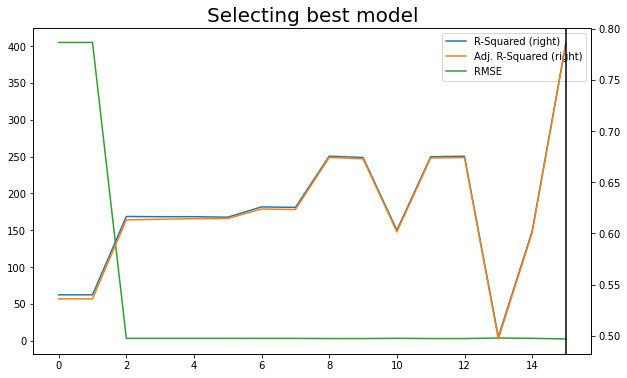

In [199]:
score_card.plot(secondary_y=['R-Squared','Adj. R-Squared'])

# display just the plot
plt.axvline(x=15, color='black',label='BEST model')
plt.title('Selecting best model',fontsize=20)
plt.show()

In [202]:
xtrain.head(1)

,Hour,Temperature(°C),Humidity(%),Wind speed (m/s),Visibility (10m),Dew point temperature(°C),Solar Radiation (MJ/m2),day,month,Holiday_Holiday,Holiday_No Holiday,Seasons_Autumn,Seasons_Spring,Seasons_Summer,Seasons_Winter,year_2017,year_2018
6325,-0.038019,-0.020815,-0.462434,-0.868257,0.614985,-0.153309,1.846439,14,11,0,1,1,0,0,0,0,1


In [203]:
xtrain111=xtrain.drop(['year_2017','year_2018','Dew point temperature(°C)','Visibility (10m)','Solar Radiation (MJ/m2)','Holiday_Holiday','Seasons_Autumn'],1)

In [204]:
xtest111=xtest.drop(['year_2017','year_2018','Dew point temperature(°C)','Visibility (10m)','Solar Radiation (MJ/m2)','Holiday_Holiday','Seasons_Autumn'],1)

In [205]:
regressor=RandomForestRegressor(n_estimators=10,random_state=2)
regressor.fit(xtrain111,ytrain)
ypred_train=regressor.predict(xtrain111)
ypred_test=regressor.predict(xtest111)

rmse_train=np.sqrt(mean_squared_error(ytrain,ypred_train))
rmse_test=np.sqrt(mean_squared_error(ytest,ypred_test))

r2_train=r2_score(ytrain,ypred_train)
r2_test=r2_score(ytest,ypred_test)

adj_r2_train=1-(((1-r2_train)*(len(xtrain111)-1))/(len(xtrain111)-len(xtrain111.columns)-1))
adj_r2_test=1-(((1-r2_test)*(len(xtest111)-1))/(len(xtest111)-len(xtest111.columns)-1))

print('rmse_train:',rmse_train,'\n','rmse_test:',rmse_test,'\n','r2_score_train:',r2_train,'\n','r2_score_test:',r2_test,'\n','adj_r2_train:',adj_r2_train,'\n','adj_r2_test:',adj_r2_test)

rmse_train: 0.8414477867513805 
 rmse_test: 1.9783910720985052 
 r2_score_train: 0.9742206709150094 
 r2_score_test: 0.8587973850031331 
 adj_r2_train: 0.9741653148293642 
 adj_r2_test: 0.8580878241237518


In [206]:
linreg_model_with_RandomForestRegressor_2 = pd.Series({
                     'Model_Name': "LRM_with_RandomForestRegressor_2",
                     'RMSE':rmse_test,
                     'R-Squared':r2_test ,
                     'Adj. R-Squared': adj_r2_test     
                   })

score_card = score_card.append(linreg_model_with_RandomForestRegressor_2  , ignore_index=True)

#call scorecard
score_card

,Model_Name,R-Squared,Adj. R-Squared,RMSE
0,LRM_using _OLS,0.540043,0.536100,404.820675
1,LRM_using_sklearn,0.540043,0.536100,404.820675
2,LRM_full_with_transformed_Rented_bike_Count,0.616574,0.613287,3.260104
3,LRM_with_Signf_feat,0.616360,0.613850,3.261013
4,LRM_signif_feat_using_backward_elimin,0.616379,0.614451,3.260934
5,LRM_with_signif_feat_using_RFECV,0.615910,0.614561,3.262927
6,LRM_with_signif_feat_Backwrd_Intrctn,0.625954,0.623885,3.219981
7,LRM_with_signif_feat_RFECV_intrctn,0.625451,0.623380,3.222144
8,LRM_with_signif_feat_RFECV_interctn_Ridge,0.675528,0.674224,2.999022
9,LRM_with_signif_feat_RFECV_intrctn_SGD,0.674194,0.672886,3.005178
